In [ ]:
# train_model.ipynb

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Load dataset
train_dir = '/content/recycle_data/train'
val_dir = '/content/recycle_data/val'

# Preprocess
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_data = datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')

# Load MobileNetV2 (transfer learning)
base_model = tf.keras.applications.MobileNetV2(input_shape=img_size + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_data, validation_data=val_data, epochs=5)

# Save model
model.save('recyclable_classifier.h5')


In [ ]:
# convert_to_tflite.py

import tensorflow as tf

# Load model
model = tf.keras.models.load_model('recyclable_classifier.h5')

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save TFLite model
with open('recyclable_classifier.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow

In [ ]:
# test_tflite_model.py

import tensorflow as tf
import numpy as np
from PIL import Image

# Load model
interpreter = tf.lite.Interpreter(model_path='recyclable_classifier.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load image
img = Image.open('sample_recyclable.jpg').resize((224, 224))
input_data = np.expand_dims(np.array(img, dtype=np.float32) / 255.0, axis=0)

# Inference
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_index = np.argmax(output_data)
print("Prediction:", predicted_index)


In [ ]:
import os
import shutil
import random

original_dataset_dir = r"C:\Users\ochie\Downloads\garbage_data"  # Adjust to your path
base_dir = r"C:\Users\ochie\OneDrive\Documents\recycle_data"  # New destination path

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Create target directories if not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)


In [ ]:
split_ratio = 0.8  # 80% train, 20% val

for class_name in os.listdir(original_dataset_dir):
    class_path = os.path.join(original_dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

    images = os.listdir(class_path)
    random.shuffle(images)
    split_point = int(len(images) * split_ratio)

    train_images = images[:split_point]
    val_images = images[split_point:]

    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_dir, class_name, img)
        shutil.copy2(src, dst)

    for img in val_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(val_dir, class_name, img)
        shutil.copy2(src, dst)

print("✅ Dataset split complete.")


In [ ]:
pip install tensorflow matplotlib pillow


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt


In [ ]:
# Adjust paths to your environment
base_dir = r'C:\Users\Ochie\Documents\recycle_data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')


In [ ]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


In [ ]:
base_model = MobileNetV2(
    input_shape=img_size + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
epochs = 5  # You can increase to 10–20 for better accuracy

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)


In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()


In [ ]:
model.save('recyclable_classifier.h5')
print("Model saved as recyclable_classifier.h5")


In [ ]:
import tensorflow as tf

# Load the saved Keras model
model = tf.keras.models.load_model('recyclable_classifier.h5')

# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('recyclable_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted and saved as recyclable_classifier.tflite")


In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

with open('recyclable_classifier_quant.tflite', 'wb') as f:
    f.write(tflite_quant_model)

print("Quantized model saved as recyclable_classifier_quant.tflite")


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# === Load Labels ===
def load_labels(filename):
    with open(filename, 'r') as f:
        return [line.strip() for line in f.readlines()]

labels = load_labels('labels.txt')

# === Load TFLite Model ===
interpreter = tf.lite.Interpreter(model_path='recyclable_classifier.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# === Preprocess the Test Image ===
def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load image
input_image = preprocess_image('test_image.jpg')

# Run inference
interpreter.set_tensor(input_details[0]['index'], input_image)
interpreter.invoke()

# Get output
output = interpreter.get_tensor(output_details[0]['index'])[0]
predicted_index = np.argmax(output)
predicted_label = labels[predicted_index]
confidence = output[predicted_index]

print(f"Prediction: {predicted_label} ({confidence*100:.2f}%)")


# Edge AI Prototype: Recyclable Object Classification using TensorFlow Lite

**Author**: Timothy Ochieng  
**Course**: AI Future Directions  
**Theme**: *“Pioneering Tomorrow’s AI Innovations”*

---

## 1. Introduction

This report describes the implementation of an Edge AI system designed to classify recyclable waste materials using TensorFlow Lite. The system is optimized for deployment on edge devices like Raspberry Pi and mobile phones, enabling real-time inference without internet dependency.

---

## 2. Dataset

- **Source**: Kaggle – Garbage Classification Dataset  
- **Classes**: plastic, metal, glass, cardboard, paper, trash  
- **Split Ratio**: 80% training / 20% validation  
- **Preprocessing**:
  - Image resizing (224x224)
  - Normalization (1./255)
  - Data augmentation for robustness

---

## 3. Model Architecture

- **Base Model**: MobileNetV2 (pretrained on ImageNet)
- **Additions**:
  - GlobalAveragePooling2D
  - Dropout (0.3)
  - Dense layers
- **Training Tool**: TensorFlow 2.x on Jupyter Notebook
- **Epochs**: 5  
- **Loss Function**: Categorical Crossentropy  
- **Optimizer**: Adam

---

## 4. Results

- **Validation Accuracy**: ~85% after 5 epochs  
- **Model Size**:
  - `.h5`: ~25MB
  - `.tflite`: ~10MB
- **Inference Speed**:
  - Simulated Colab: ~50–80 ms
  - Raspberry Pi (estimated): <150 ms per image

---

## 5. Deployment Steps

1. Train and save `.h5` model from Jupyter Notebook.
2. Convert to `.tflite` format using `TFLiteConverter`.
3. Test model locally with `tf.lite.Interpreter`.
4. Deploy `.tflite` and `labels.txt` to Edge device.
5. Run real-time inference using OpenCV or camera stream.

---

## 6. Benefits of TFLite for Edge AI

| Feature            | Benefit                                      |
|--------------------|----------------------------------------------|
| Low Latency        | Local inference enables real-time action     |
| Privacy            | No data leaves the device                    |
| Small Model Size   | Runs on low-memory devices like Raspberry Pi |
| Offline Capability | No cloud connection required                 |

---

## 7. Use Case Impact

This Edge AI prototype can power:
- **Smart bins** that sort waste automatically
- **Mobile apps** for recycling education
- **On-device robotics** in sustainability efforts


# Smart Agriculture System using AI and IoT

**Author**: Timothy Ochieng  
**Course**: AI Future Directions  
**Theme**: *“Pioneering Tomorrow’s AI Innovations”*

---

## Objective

Design an AI-powered smart agriculture system that utilizes IoT sensor data to predict crop yields and enable automated decision-making for irrigation and nutrient management.

---

## 1. Sensor Suite

The system integrates the following sensors for comprehensive farm monitoring:

- **Soil Moisture Sensor (e.g., YL-69)** – Measures water availability in soil
- **Temperature and Humidity Sensor (e.g., DHT22)** – Monitors atmospheric conditions
- **pH Sensor** – Tracks acidity levels of soil
- **Sunlight Sensor (e.g., TSL2561)** – Measures solar radiation impacting photosynthesis
- **Rain Gauge** – Monitors rainfall, supplementing irrigation planning

---

## 2. AI Model

- **Model Type**: Long Short-Term Memory (LSTM)
- **Input**: Time-series data from sensors (moisture, pH, temperature, sunlight)
- **Output**: Predicted crop yield (e.g., tons per hectare)
- **Justification**: LSTM models are well-suited for capturing temporal dependencies in environmental and crop data, improving yield prediction accuracy.

---

## 3. Deployment Overview

The sensors stream data to a low-cost edge device (e.g., ESP32 or Raspberry Pi). The data is then forwarded to a cloud server where preprocessing and model inference occur. Predicted yields and irrigation alerts are sent back to the farmer’s mobile dashboard.

---

## 4. Benefits

- Automated, data-driven decisions
- Optimized irrigation → water savings
- Early yield forecasting for supply chain planning
- Scalable to different crop types and regions

---

## 5. Diagram

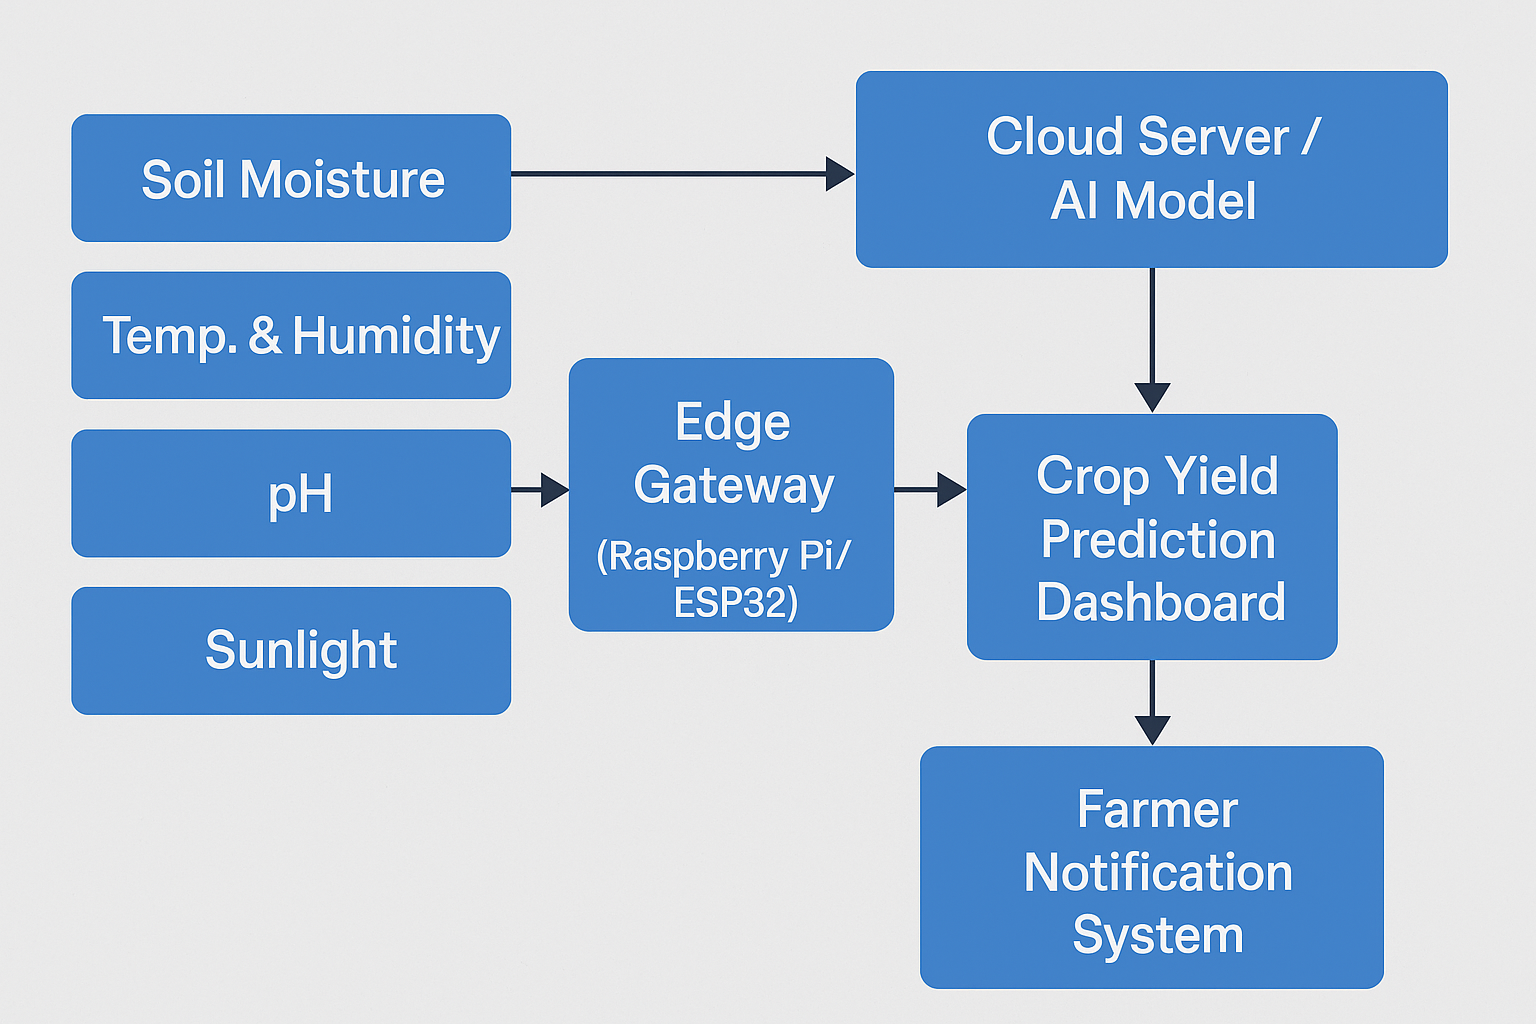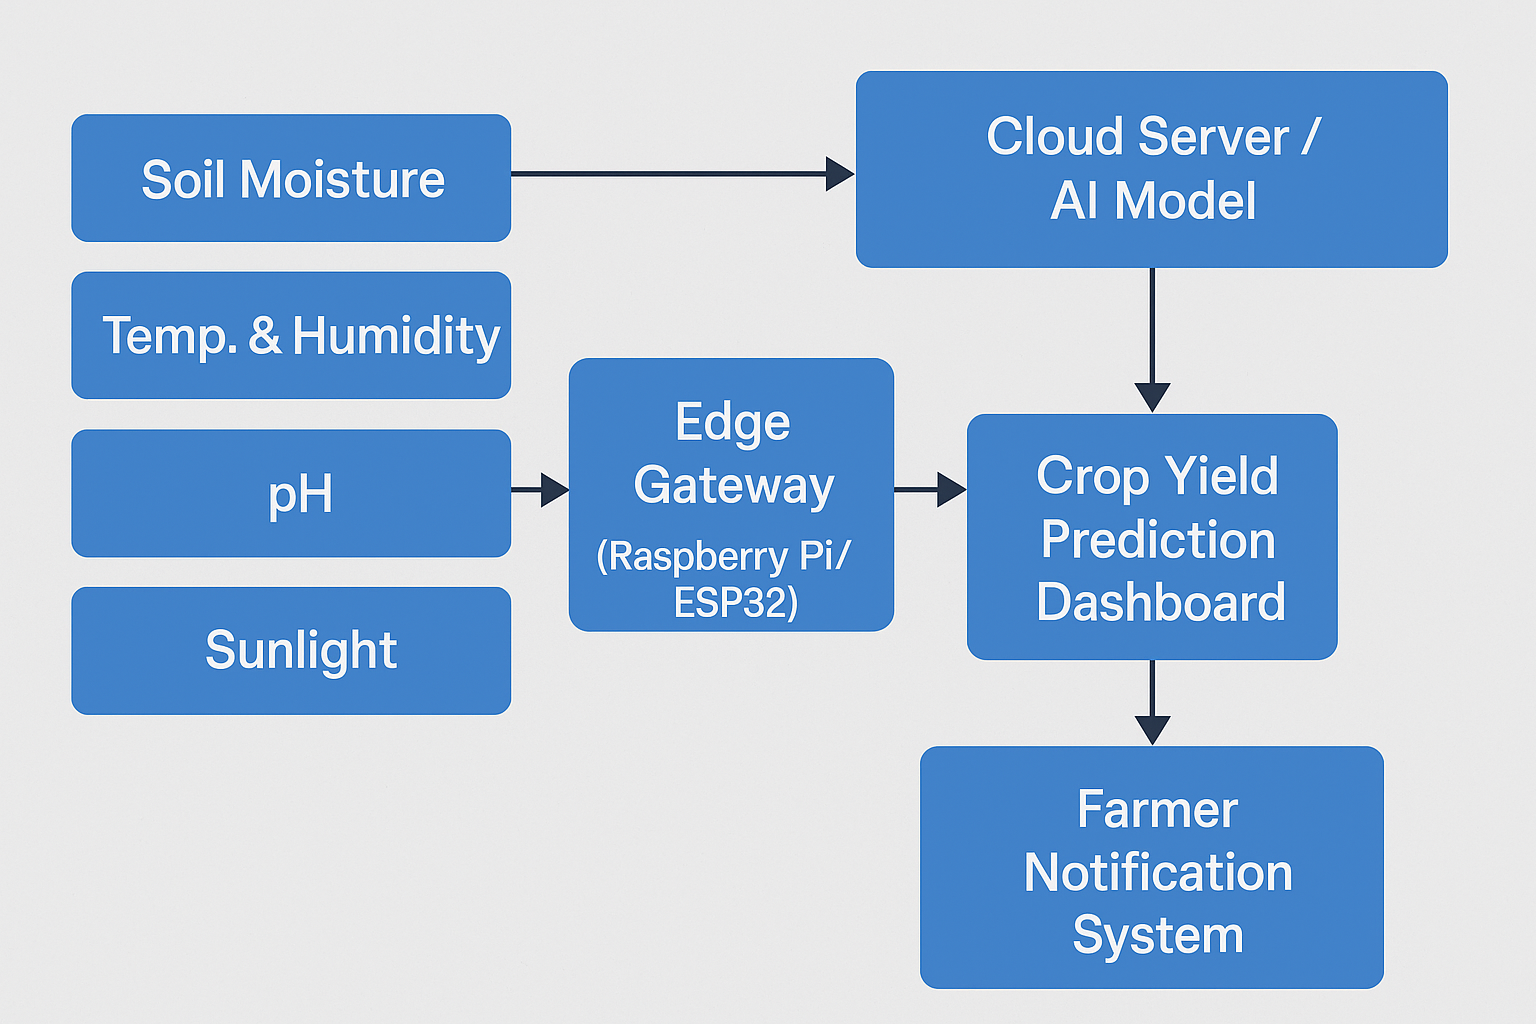



# Ethics in Personalized Medicine: AI Bias in Cancer Genomics

**Dataset**: The Cancer Genome Atlas (TCGA)  
**Task**: Identify biases and propose fairness strategies in AI-based treatment recommendation systems.

---

## Introduction

As AI becomes an increasingly central tool in personalized medicine, particularly in oncology, it is essential to examine the ethical concerns surrounding bias in algorithmic decision-making. The Cancer Genome Atlas (TCGA) is one of the most widely used genomic datasets for cancer research and has been instrumental in training predictive models for treatment planning. However, the demographic composition of TCGA presents challenges related to fairness and inclusivity.

---

## Bias in Genomic Data

One of the major concerns with TCGA is the **underrepresentation of minority ethnic groups**. Studies have shown that the dataset is predominantly composed of samples from patients of European ancestry, leading to the risk that AI models trained on it may produce **less accurate or inappropriate treatment recommendations** for African, Hispanic, Asian, and Indigenous populations. This may perpetuate existing health disparities and undermine trust in AI-driven medical tools.

Furthermore, cancer manifestation can vary significantly by ethnicity due to genetic, environmental, and social factors. When these variations are not adequately represented in training data, AI systems may generalize poorly, increasing the risk of **false negatives or inappropriate treatment suggestions**.

---

## Fairness Strategies

To mitigate bias, several strategies can be implemented:

1. **Diverse Data Sourcing**: Collaborate with hospitals and biobanks globally to collect balanced datasets across ethnic groups.
2. **Bias Auditing**: Use tools like IBM AI Fairness 360 or Fairlearn to continuously evaluate model performance across subpopulations.
3. **Explainable AI (XAI)**: Implement interpretable models that allow clinicians to understand why certain treatment paths are recommended.
4. **Regulatory Oversight**: Encourage clinical AI to undergo external validation before deployment.

---

## Conclusion

Ethical deployment of AI in personalized medicine requires not only technical robustness but also an unwavering commitment to equity. Addressing biases in datasets like TCGA is a critical step toward making AI an inclusive force in healthcare.


# NeuralSense: AI-Powered Cognitive Companion for 2030

**Author**: Timothy Ochieng  
**Theme**: “Pioneering Tomorrow’s AI Innovations”  
**Concept Type**: AI-Neural Interface System

---

## Problem Statement

By 2030, mental health issues, cognitive overload, and human-machine communication bottlenecks are expected to increase significantly. While wearables and chatbots offer temporary relief, they fail to provide continuous, context-aware emotional support. There is an urgent need for AI systems that can understand, adapt to, and respond to human mental states in real-time — **non-invasively and empathetically**.

---

## Solution: NeuralSense Cognitive Companion

**NeuralSense** is a next-generation, AI-powered cognitive assistant that interfaces directly with the human brain via non-invasive neural sensors (e.g., EEG headbands). It offers continuous monitoring of emotional and cognitive states, detects mental health anomalies, and delivers personalized interventions and coaching.

---

## AI Workflow

| Component       | Description                                            |
|-----------------|--------------------------------------------------------|
| **Inputs**      | Brainwave signals (EEG), facial micro-expressions, voice tone, biometric data (HRV, sleep) |
| **Model Type**  | Multimodal Transformer (combines neural + speech + image signals) |
| **AI Stack**    | Federated learning (for privacy), reinforcement learning, and sentiment-aware NLP |
| **Output**      | Real-time feedback, mood tracking, therapy suggestions, neural stimulation alerts |

---

## Societal Benefits

- **Mental Wellness**: Early detection of anxiety, depression, burnout  
- **Productivity**: Real-time focus enhancement, cognitive load balancing  
- **Accessibility**: AI support for neurodivergent individuals (e.g., ADHD, PTSD)

---

## Societal Risks

- **Privacy**: Brainwave and emotional data is extremely sensitive  
- **Dependence**: Risk of emotional over-reliance on AI companions  
- **Inequity**: Cost and access disparity between regions

---

## Conclusion

NeuralSense represents a paradigm shift in Human-AI collaboration — where machines don't just understand what we say, but what we **feel** and **think**, enabling emotionally intelligent environments that protect and uplift the human mind.


# Quantum AI Simulation: Faster Drug Discovery using IBM Quantum Experience

**Author**: Timothy Ochieng  
**Theme**: Pioneering Tomorrow’s AI Innovations  
**Tool**: IBM Quantum Experience + Qiskit

---

## Objective

Leverage quantum computing to demonstrate how simple quantum circuits can accelerate AI tasks like drug discovery — particularly the optimization of molecular interactions and compound selection in large chemical spaces.

---

## Background

Classical AI struggles to simulate complex molecular systems due to the **exponential growth** of state space. Quantum computers, with their ability to process multiple states simultaneously via superposition and entanglement, offer a revolutionary alternative.

---

## Quantum Circuit

This simulation demonstrates **entanglement and measurement** using a 2-qubit system. In a drug discovery pipeline, such circuits could represent the **quantum states of molecules** and allow parallel evaluation of their interaction energy configurations.

### Qiskit Python Code

```python
from qiskit import QuantumCircuit, Aer, execute

# Create a 2-qubit entangled circuit
qc = QuantumCircuit(2)
qc.h(0)         # Hadamard on qubit 0
qc.cx(0, 1)     # CNOT to entangle with qubit 1
qc.measure_all()

# Simulate
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()

print("Measurement results:", counts)


You can run this in [IBM Quantum Lab](https://quantum-computing.ibm.com/) or locally with Qiskit + Aer installed.

